In [1]:
import os

In [2]:
base_dir = 'C:/Masters/Sem02_Winter2022/DeepLearning/DeepLearning/CatsAndDogs'
train_dir = os.path.join(os.path.normpath(base_dir), 'training')
validation_dir = os.path.join(os.path.normpath(base_dir), 'validation')
# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

validation_cats_dir

'C:\\Masters\\Sem02_Winter2022\\DeepLearning\\DeepLearning\\CatsAndDogs\\validation\\cats'

In [3]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
validation_cat_fnames=os.listdir( validation_cats_dir )
validation_dog_fnames=os.listdir( validation_dogs_dir )
print(validation_cat_fnames[:10])
print(validation_dog_fnames[:10])

['cat.2000.jpg', 'cat.2001.jpg', 'cat.2002.jpg', 'cat.2003.jpg', 'cat.2004.jpg', 'cat.2005.jpg', 'cat.2006.jpg', 'cat.2007.jpg', 'cat.2008.jpg', 'cat.2009.jpg']
['dog.2000.jpg', 'dog.2001.jpg', 'dog.2002.jpg', 'dog.2003.jpg', 'dog.2004.jpg', 'dog.2005.jpg', 'dog.2006.jpg', 'dog.2007.jpg', 'dog.2008.jpg', 'dog.2009.jpg']


In [4]:
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))

2000
2000
500
500


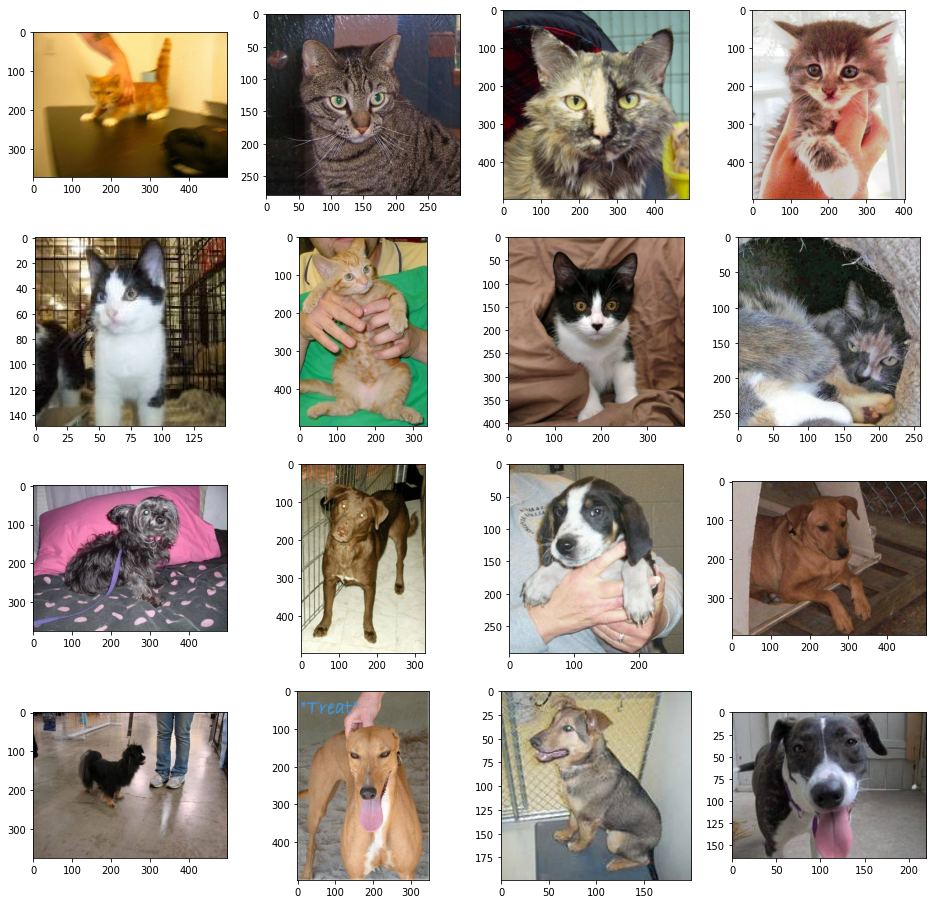

In [5]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4
pic_index = 0
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index+=8
next_cat_pic=[os.path.join(train_cats_dir,fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pic=[os.path.join(train_dogs_dir,fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i,imgPath in enumerate(next_cat_pic+next_dog_pic):
    sp=plt.subplot(nrows,ncols,i+1)
    img=mpimg.imread(imgPath)
    plt.imshow(img)
plt.show()

In [9]:
import tensorflow as tf

In [491]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2),padding='valid'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),padding='valid'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),padding='valid'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 17, 17, 64)     

In [492]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

In [493]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale = 1.0/255., 
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               horizontal_flip = True)
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,batch_size=25,class_mode='binary',target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,batch_size=25,class_mode = 'binary',target_size = (150, 150))

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [494]:

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,epochs=50,
                    validation_steps=10,verbose=2)

Epoch 1/50
100/100 - 71s - loss: 0.8503 - acc: 0.5260 - val_loss: 0.6853 - val_acc: 0.6400 - 71s/epoch - 705ms/step
Epoch 2/50
100/100 - 68s - loss: 0.6759 - acc: 0.6224 - val_loss: 0.6284 - val_acc: 0.6480 - 68s/epoch - 678ms/step
Epoch 3/50
100/100 - 67s - loss: 0.6418 - acc: 0.6364 - val_loss: 0.5502 - val_acc: 0.6840 - 67s/epoch - 675ms/step
Epoch 4/50
100/100 - 67s - loss: 0.6294 - acc: 0.6632 - val_loss: 0.5371 - val_acc: 0.7160 - 67s/epoch - 675ms/step
Epoch 5/50
100/100 - 68s - loss: 0.6097 - acc: 0.6744 - val_loss: 0.6774 - val_acc: 0.6600 - 68s/epoch - 677ms/step
Epoch 6/50
100/100 - 67s - loss: 0.5840 - acc: 0.6992 - val_loss: 0.5319 - val_acc: 0.7360 - 67s/epoch - 670ms/step
Epoch 7/50
100/100 - 67s - loss: 0.5567 - acc: 0.7132 - val_loss: 0.5150 - val_acc: 0.7880 - 67s/epoch - 668ms/step
Epoch 8/50
100/100 - 67s - loss: 0.5582 - acc: 0.7072 - val_loss: 0.5402 - val_acc: 0.7400 - 67s/epoch - 670ms/step
Epoch 9/50
100/100 - 67s - loss: 0.5373 - acc: 0.7300 - val_loss: 0.4793

In [506]:
model.save('catsAndDogs.h5')

In [495]:
modelSaved=tf.keras.models.load_model('catsAndDogs.h5')
modelSaved.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 17, 17, 128)    

In [503]:
from keras.preprocessing import image
import random
cat_img_files = [os.path.join(validation_cats_dir, f) for f in validation_cat_fnames]
dog_img_files = [os.path.join(validation_dogs_dir, f) for f in validation_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
print(img_path)
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
classes = model.predict(x, batch_size=10)
classes

imgName=img_path.split("\\")[-1]
if(round(classes[0][0])>0):
    print('{} is a Dog'.format(imgName))
else:
    
    print('{} is a Cat'.format(imgName))

C:\Masters\Sem02_Winter2022\DeepLearning\DeepLearning\CatsAndDogs\validation\dogs\dog.2265.jpg
dog.2265.jpg is a Dog


In [468]:
# total=len(cat_img_files + dog_img_files)
# count=0
# classObj={'cat':0,'dog':1}

# for path in (cat_img_files + dog_img_files):
   
#     img=image.load_img(path,target_size=(150,150))
#     x=image.img_to_array(img)
#     x=np.expand_dims(x,axis=0)
#     images=np.vstack([x])
#     classes = model.predict(x, batch_size=10)
#     orgClass=path.split("\\")[-1].split('.')[0]
# #     print(path.split("\\")[-1].split('.')[1],':', classObj[orgClass],classes[0][0])
#     if(classObj[orgClass]==round(classes[0][0])):
#         count+=1
# accPer=(count/total)*100
# accPer

In [402]:
validation_generator.class_indices

{'cats': 0, 'dogs': 1}

C:\Users\surya\AppData\Local\Temp\ipykernel_2400\2091117870.py:34: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


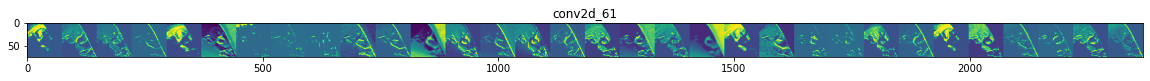

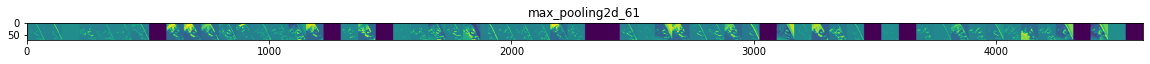

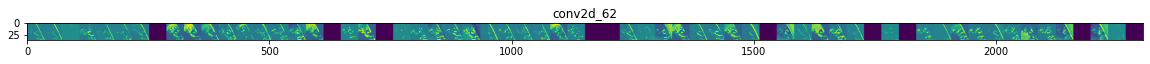

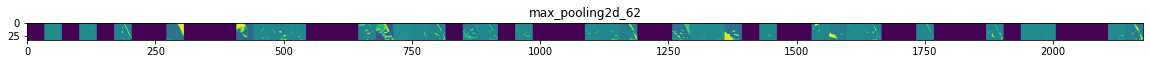

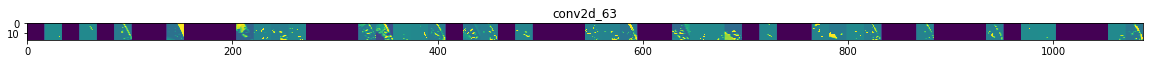

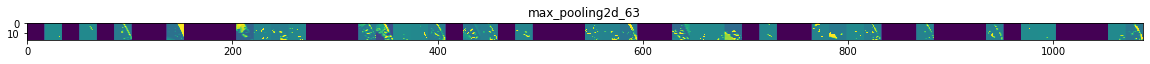

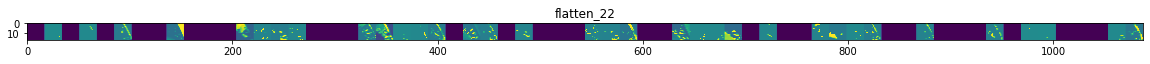

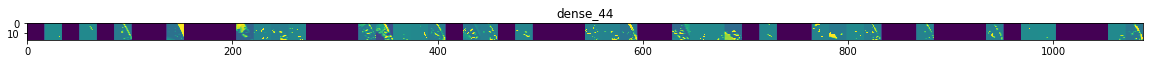

In [518]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

cat_img_files = [os.path.join(validation_cats_dir, f) for f in validation_cat_fnames]
dog_img_files = [os.path.join(validation_dogs_dir, f) for f in validation_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150)) # this is a PIL image
x = img_to_array(img) # Numpy array with shape (150, 150, 3)

x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150, 150, 3)

x /= 255.0

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
     
        n_features = feature_map.shape[-1] # number of features in the feature map
        size = feature_map.shape[ 1] # feature map shape (1, size, size, n_features)
       
        display_grid = np.zeros((size, size * n_features))
    
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid
            
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

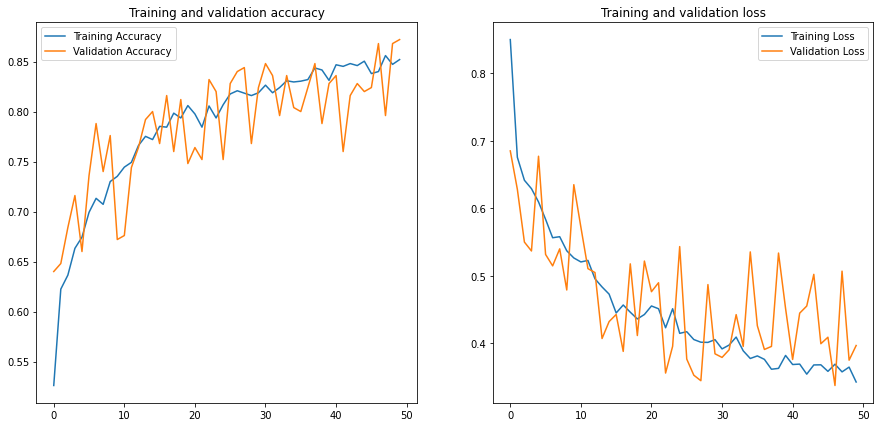

In [511]:
acc = history.history[ 'acc' ]
val_acc = history.history[ 'val_acc' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) # Get number of epochs


ax=plt.figure(figsize=(15,7))
ax1=ax.add_subplot(1,2,1)
plt.title ('Training and validation accuracy')


ax1.plot ( epochs, acc,label='Training Accuracy' )
ax1.plot ( epochs, val_acc ,label='Validation Accuracy')
ax1.legend()

ax2=ax.add_subplot(1,2,2)
ax2.plot ( epochs, loss,label='Training Loss')
ax2.plot ( epochs, val_loss ,label='Validation Loss')
plt.title ('Training and validation loss' )
ax2.legend()

plt.show()


In [499]:
newModel=tf.keras.models.Sequential()

In [500]:
for i in model.layers[:-3]:
    newModel.add(i)
newModel.summary()


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 17, 17, 64)     

In [508]:
features=newModel.predict(validation_generator)
features

array([[[[0.00000000e+00, 1.66180700e-01, 0.00000000e+00, ...,
          0.00000000e+00, 1.40954286e-01, 1.01639025e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 2.02404261e-02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 8.04573894e-02],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 2.06169516e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.97473258e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 3.82389307e-01]],

        [[0.00000000e+00, 1.67194411e-01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.03657104e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
